In [1]:

import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg
import os
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10
squidpy==1.2.3


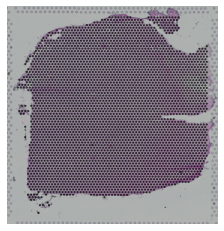

In [2]:
section_id ='151669'    
input_dir = os.path.join('/mnt/disk1/xzhou/data/spatial_3D/DLPFC/', section_id)
adata_st = sc.read_visium(path=input_dir, count_file=section_id + '_filtered_feature_bc_matrix.h5', load_images=True)
adata_st.var_names_make_unique(join="++")

# read the annotation
Ann_df = pd.read_csv(os.path.join(input_dir, section_id + '_truth.txt'), sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
Ann_df[Ann_df.isna()] = "unknown"
adata_st.obs['Ground Truth'] = Ann_df.loc[adata_st.obs_names, 'Ground Truth'].astype('category') 

#'Ground Truth' 是原始列名，你需要将其改为 'cell_type'
adata_st.obs.rename(columns={'Ground Truth': 'cell_type'}, inplace=True)
sc.pl.spatial(adata_st, alpha=0.7, frameon=False, show=True)

In [3]:
sc.pp.highly_variable_genes(adata_st, n_top_genes=2000, flavor="seurat_v3")
sc.pp.normalize_total(adata_st)
sc.pp.log1p(adata_st)

In [4]:
ad_sp1 = adata_st.copy()

In [5]:
adata_st

AnnData object with n_obs × n_vars = 3661 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'

In [6]:
ad_sc = sc.read_h5ad("/mnt/disk1/xiaojk/data/DLPFC/GeneScoreMatrix.h5ad")

In [7]:
ad_sc

AnnData object with n_obs × n_vars = 5262 × 23127
    obs: 'cell_type'
    var: 'features'

In [8]:
ad_sc

AnnData object with n_obs × n_vars = 5262 × 23127
    obs: 'cell_type'
    var: 'features'

In [9]:
np.unique(ad_sc.X.toarray()[0, :])

array([0.0000e+00, 1.9000e-02, 2.2000e-02, ..., 1.1342e+01, 1.6189e+01,
       3.2453e+01])

In [10]:
sc.pp.normalize_total(ad_sc)

In [11]:
ad_sc.obs['subclass_label'] = ad_sc.obs.cell_type

In [12]:
ad_sp1.obs.cell_type.value_counts()

cell_type
Layer_3    2141
Layer_5     510
Layer_6     391
Layer_4     364
WM          230
unknown      25
Name: count, dtype: int64

In [13]:
ad_sc.obs.subclass_label.value_counts()

subclass_label
Oligo      1075
L4          785
L2/3        756
Micro       713
OPC         673
MGE der     617
CGE der     473
L5/6         72
Astro        71
Vas          16
PN dev       11
Name: count, dtype: int64

In [14]:
adata_sc = ad_sc.copy()
adata_sc

AnnData object with n_obs × n_vars = 5262 × 23127
    obs: 'cell_type', 'subclass_label'
    var: 'features'

In [15]:
sc.tl.rank_genes_groups(adata_sc, groupby="subclass_label", use_raw=False)
markers_df = pd.DataFrame(adata_sc.uns["rank_genes_groups"]["names"]).iloc[0:100, :]
markers = list(np.unique(markers_df.melt().value.values))
len(markers)

888

In [16]:
markers

['AATK',
 'ABCA13',
 'ABCA2',
 'ABCB5',
 'ABCC1',
 'ABCC4',
 'ABI3',
 'ABLIM1',
 'ABR',
 'ACSS3',
 'ACTN1',
 'ACVR1',
 'ADAMTS3',
 'ADAMTS9',
 'ADAP1',
 'ADARB2',
 'ADARB2-AS1',
 'ADCY2',
 'ADCYAP1R1',
 'ADGRB1',
 'ADGRD1',
 'ADH5',
 'ADORA3',
 'ADRB2',
 'AFAP1',
 'AFAP1L2',
 'AFF2',
 'AGAP1',
 'AGBL1',
 'AGBL4',
 'AGMO',
 'AHDC1',
 'AJUBA',
 'AKAP2',
 'ALCAM',
 'ALK',
 'AMOTL1',
 'AMOTL2',
 'ANGPT1',
 'ANK1',
 'ANK2',
 'ANXA5',
 'APBB2',
 'AQP4-AS1',
 'ARAP2',
 'ARHGAP10',
 'ARHGAP23',
 'ARHGAP24',
 'ARHGAP25',
 'ARHGAP26',
 'ARHGAP29',
 'ARHGAP44',
 'ARHGEF17',
 'ASCL1',
 'ASIC2',
 'ASTN2',
 'ATG7',
 'ATP10A',
 'ATP13A4',
 'ATP1A2',
 'ATP2B2',
 'ATP8A2',
 'ATRNL1',
 'AUTS2',
 'AXIN2',
 'B3GNT5',
 'B3GNT7',
 'B4GALT1',
 'B9D1',
 'BAIAP2',
 'BANK1',
 'BCAN',
 'BCAR1',
 'BCL11A',
 'BCL11B',
 'BEND4',
 'BFSP2',
 'BHLHA9',
 'BIN1',
 'BMP6',
 'BMP7',
 'BMPER',
 'BRINP1',
 'BSN',
 'BTBD11',
 'BTBD9',
 'C1QL1',
 'C1orf61',
 'C3',
 'C4orf45',
 'C9orf139',
 'C9orf3',
 'C9orf62',
 'CA10',
 'CAB

In [17]:
tg.pp_adatas(adata_sc, adata_st, genes=markers)

INFO:root:796 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:16872 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [18]:
adata_st.obs["uniform_density"]

AAACAAGTATCTCCCA-1    0.000273
AAACACCAATAACTGC-1    0.000273
AAACAGAGCGACTCCT-1    0.000273
AAACAGGGTCTATATT-1    0.000273
AAACATTTCCCGGATT-1    0.000273
                        ...   
TTGTTGTGTGTCAAGA-1    0.000273
TTGTTTCACATCCAGG-1    0.000273
TTGTTTCATTAGTCTA-1    0.000273
TTGTTTCCATACAACT-1    0.000273
TTGTTTGTGTAAATTC-1    0.000273
Name: uniform_density, Length: 3661, dtype: float64

In [19]:
assert adata_sc.uns['training_genes'] == adata_st.uns['training_genes']

In [20]:
ad_map = tg.map_cells_to_space(adata_sc, adata_st,
    mode="cells",
#     mode="clusters",
#     cluster_label='cell_subclass',  # .obs field w cell types
    density_prior='rna_count_based',
    num_epochs=500,
    device="cuda:1",
#     device='cpu',
)

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 796 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.262, KL reg: 0.011
Score: 0.438, KL reg: 0.002
Score: 0.444, KL reg: 0.002
Score: 0.445, KL reg: 0.002
Score: 0.446, KL reg: 0.002


INFO:root:Saving results..


In [21]:
ad_map

AnnData object with n_obs × n_vars = 5262 × 3661
    obs: 'cell_type', 'subclass_label'
    var: 'in_tissue', 'array_row', 'array_col', 'cell_type', 'uniform_density', 'rna_count_based_density'
    uns: 'train_genes_df', 'training_history'

In [22]:
ad_sp1

AnnData object with n_obs × n_vars = 3661 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'

In [23]:
def construct_obs_plot(df_plot, adata, perc=0, suffix=None):
    # clip
    df_plot = df_plot.clip(df_plot.quantile(perc), df_plot.quantile(1 - perc), axis=1)

    # normalize
    df_plot = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

    if suffix:
        df_plot = df_plot.add_suffix(" ({})".format(suffix))
    adata.obs = pd.concat([adata.obs, df_plot], axis=1)
    
    
def plot_cell_annotation_sc(
    adata_sp, 
    annotation_list, 
    x="x", 
    y="y", 
    spot_size=None, 
    scale_factor=None, 
    perc=0,
    alpha_img=1.0,
    bw=False,
    ax=None
):
        
    # remove previous df_plot in obs
    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

    # construct df_plot
    df = adata_sp.obsm["tangram_ct_pred"][annotation_list]
    construct_obs_plot(df, adata_sp, perc=perc)
    
    #non visium data 
    if 'spatial' not in adata_sp.obsm.keys():
        #add spatial coordinates to obsm of spatial data 
        coords = [[x,y] for x,y in zip(adata_sp.obs[x].values,adata_sp.obs[y].values)]
        adata_sp.obsm['spatial'] = np.array(coords)
    
    if 'spatial' not in adata_sp.uns.keys() and spot_size == None and scale_factor == None:
        raise ValueError("Spot Size and Scale Factor cannot be None when ad_sp.uns['spatial'] does not exist")
    
    #REVIEW
    if 'spatial' in adata_sp.uns.keys() and spot_size != None and scale_factor != None:
        raise ValueError("Spot Size and Scale Factor should be None when ad_sp.uns['spatial'] exists")
    
    sc.pl.spatial(
        adata_sp, color=annotation_list, cmap="viridis", show=False, frameon=False, spot_size=spot_size,
        scale_factor=scale_factor, alpha_img=alpha_img, bw=bw, ax=ax,colorbar_loc=None,ncols=5,wspace=0
    )

    adata_sp.obs.drop(annotation_list, inplace=True, errors="ignore", axis=1)

In [24]:
list(ad_sc.obs.subclass_label.unique())

['MGE der',
 'L2/3',
 'L4',
 'PN dev',
 'CGE der',
 'Astro',
 'L5/6',
 'Oligo',
 'OPC',
 'Micro',
 'Vas']

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


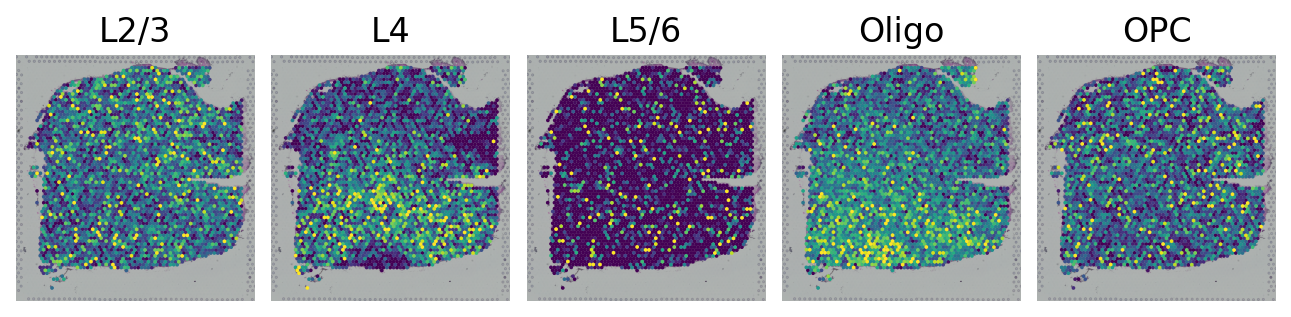

In [25]:
tg.project_cell_annotations(ad_map, adata_st, annotation="subclass_label")
annotation_list = list(ad_sc.obs.subclass_label.unique())

sc.settings.set_figure_params(frameon=True, fontsize=15, facecolor='white', figsize=(2, 2)) #dpi=300, 
plot_cell_annotation_sc(adata_st,['L2/3', 'L4','L5/6', 'Oligo','OPC'],perc=0.02, spot_size= 150)
# plot_cell_annotation_sc(adata_st,annotation_list,perc=0.02, spot_size= 150)

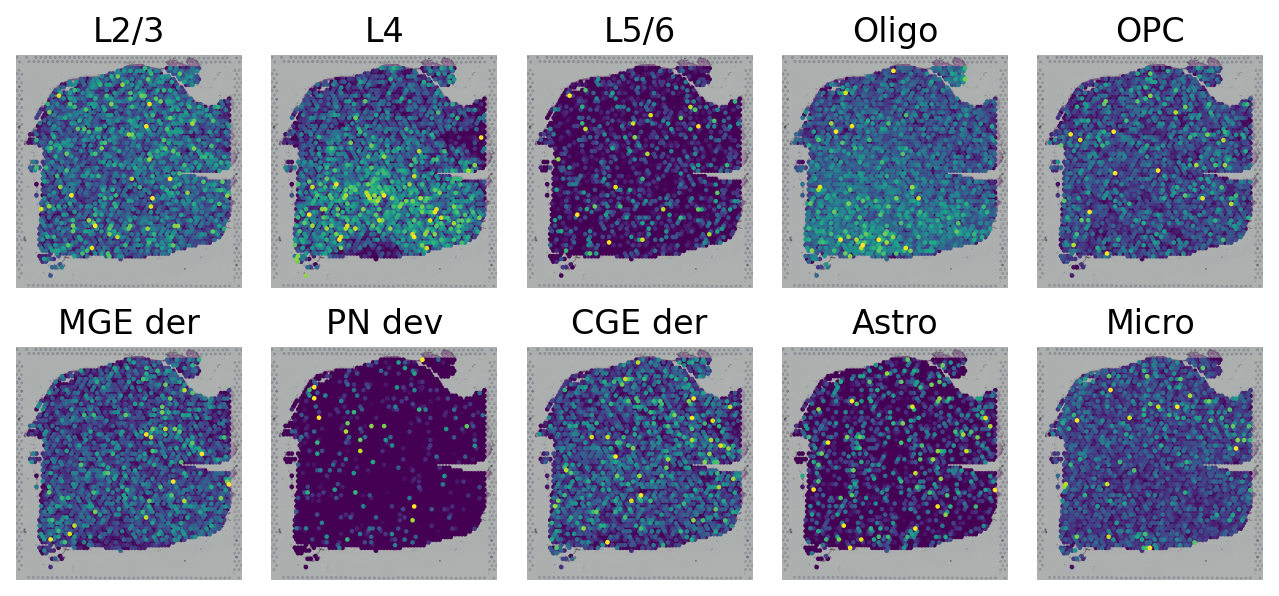

In [26]:
annotation_list = ['L2/3','L4','L5/6','Oligo','OPC','MGE der','PN dev','CGE der','Astro','Micro']
sc.settings.set_figure_params(frameon=True, fontsize=15, facecolor='white',figsize=(2, 2)) #dpi=300, 
# import tangram as tg
# plot_cell_annotation_sc(rna, annotation_list, x='x', y='y', spot_size= 60, scale_factor=0.1, perc=0.001)
plot_cell_annotation_sc(adata_st, annotation_list, x='x', y='y',spot_size=200, perc=0.001)

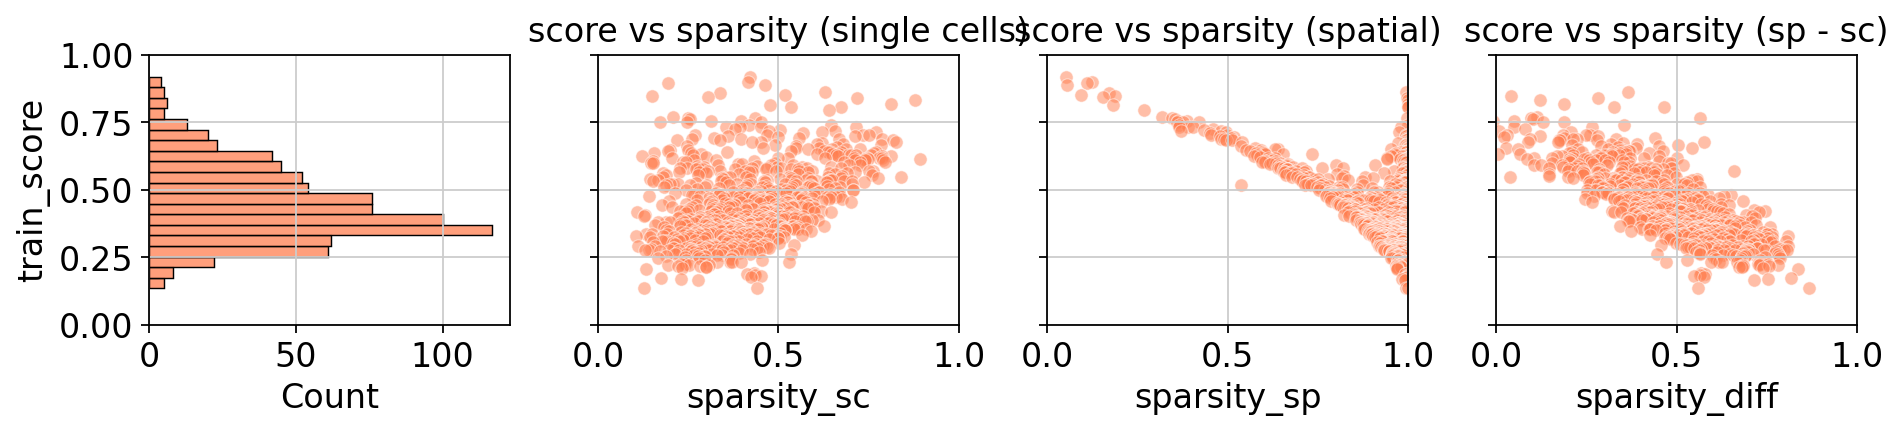

In [27]:
tg.plot_training_scores(ad_map, bins=20, alpha=.5)

In [ ]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=adata_sc)
ad_ge

In [ ]:
ad_map